# Spotify & Billboard Data Exploration

## Initial Setup

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

_ = plt.ion()

## Import and display the datasets

In [120]:
billboard_weekly_df = pd.read_csv('dataset/billboard_hot100.csv')
billboard_weekly_df['date'] = pd.to_datetime(billboard_weekly_df['date'])
for col in ["rank", "last-week", "peak-rank", "weeks-on-board"]:
    billboard_weekly_df[col] = pd.to_numeric(billboard_weekly_df[col], errors="coerce")
billboard_weekly_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [121]:
spotify_df = pd.read_csv('dataset/spotify_top100_2010_2023.csv', encoding='latin1') # utf-8 gives error
for col in ["danceability","energy","loudness","mode","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature","key"]:
    if col in spotify_df.columns:
        spotify_df[col] = pd.to_numeric(spotify_df[col], errors="coerce")

spotify_df["year"] = pd.to_numeric(spotify_df["year"], errors="coerce")
spotify_df["track_popularity"] = pd.to_numeric(spotify_df["track_popularity"], errors="coerce")
spotify_df

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,81,Oops!... I Did It Again,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",81,...,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,83,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,66,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",62,...,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,It's My Life,81,Crush,58lV9VcRSjABbAbfWS6skp,Bon Jovi,"['glam metal', 'rock']",79,...,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,75,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",70,...,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,0HD8mbiPjp3o94X3EaZp0o,exes,56,exes,45dkTj5sMRSjrmBSBeiHym,Tate McRae,['pop'],85,...,-6.324,0,0.0621,0.1520,0.000136,0.1020,0.551,136.965,159400,4
2396,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,3XB5uhhlYSnkxpSihkNQwh,QLONA,79,MAÑANA SERÁ BONITO (BICHOTA SEASON),790FomKkXshlbRYZFtlgla,KAROL G,"['reggaeton', 'reggaeton colombiano', 'trap la...",90,...,-7.409,0,0.3380,0.5250,0.000002,0.0871,0.421,169.925,172798,4
2397,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,4sx6NRwL6Ol3V6m9exwGlQ,LOVE AGAIN,69,LOVE AGAIN,2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,['australian hip hop'],79,...,-6.691,0,0.0275,0.7160,0.000000,0.1110,0.468,107.001,145850,4
2398,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,2Zo1PcszsT9WQ0ANntJbID,Feather,91,emails i cant send fwd:,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,['pop'],82,...,-4.370,0,0.0339,0.0893,0.000000,0.0927,0.836,123.510,185553,4


# Data Cleaning and Preprocessing

As we saw from the sample data above, the billboard dataset dates back to the 1950s, while the Spotify dataset is much more recent. To make the datasets more comparable, we will filter the billboard dataset to only include entries from 2010 onwards. Additionally, we will clean the song and artist names by converting them to lowercase and removing any rows with missing values in these columns.

### Some utils

In [122]:
# regex patterns for cleaning song and artist names
# I did use chatGPT to help me write these regexes...
RE_WHITESPACE = re.compile(r"\s+")
RE_FEAT = re.compile(r"[\s\-]*\b(feat\.?|featuring|ft\.)\b\s+(.+)$", flags=re.IGNORECASE)
RE_NON_ALNUM = re.compile(r"[^a-zA-Z0-9'\- ]+")
RE_TRIM = re.compile(r"^\s+|\s+$")
RE_KEYWORDS = re.compile(r"(?i)\s*(official\s*(video|audio)|lyrics|HD)\s*$")
RE_VERSION = re.compile(
    r"""[\s\-\(\[]*
        (?:remix|radio\ edit|edit|mix|version|remaster(?:ed)?\s*\d*|live|acoustic|
           explicit|clean|from\s+.*?soundtrack)
        [\)\]]*\s*$""",
    flags=re.IGNORECASE | re.VERBOSE
)


def basic_clean(s: str) -> str:
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    s = RE_WHITESPACE.sub(" ", s)
    s = RE_TRIM.sub("", s)
    s = RE_NON_ALNUM.sub("", s)
    return s

def normalize_title(title):
    if pd.isna(title):
        return np.nan, [], False, None
    raw = str(title)
    s = basic_clean(raw)

    contributors = []
    m = RE_FEAT.search(s)
    if m:
        # whole 'feat ...' tail
        contributors_txt = m.group(2)
        s = s[:m.start()].strip()
        contributors = re.split(r"\s*(?:&|,|;|\s+x\s+|\s+with\s+|\s+and\s+|\s*\+\s*)\s*", contributors_txt)
        contributors = [c.strip() for c in contributors if c.strip()]

    # remove one pass of trailing version tags
    flag_versioned = False
    removed_suffix = None
    m2 = RE_VERSION.search(s)
    if m2:
        flag_versioned = True
        removed_suffix = s[m2.start():]
        s = s[:m2.start()].strip()

    # cleanup leftover empty parens/brackets and extra spaces
    s = s.replace("()", "").replace("[]", "").strip()
    s = RE_WHITESPACE.sub(" ", s)

    return s, contributors, flag_versioned, removed_suffix

def normalize_artist(artist):
    if pd.isna(artist):
        return np.nan, []
    s = basic_clean(artist)

    feat_extra = []
    m = RE_FEAT.search(s)
    if m:
        feat_extra_txt = m.group(2)
        s = s[:m.start()].strip()
        feat_extra = re.split(r"\s*(?:&|,|;|\s+x\s+|\s+with\s+|\s+and\s+|\s*\+\s*)\s*", feat_extra_txt)
        feat_extra = [c.strip() for c in feat_extra if c.strip()]

    # split main artist field on connectors
    parts = re.split(r"\s*(?:&|,|;|\s+x\s+|\s+with\s+|\s+and\s+|\s*\+\s*)\s*", s)
    parts = [p.strip() for p in parts if p.strip()]
    if not parts:
        return np.nan, []

    artist_base = parts[0]
    others = parts[1:]
    artist_all = [artist_base] + others + feat_extra

    # dedupe but preserve order
    seen = set()
    artist_all = [a for a in artist_all if not (a in seen or seen.add(a))]

    return artist_base, artist_all

### Load and clean the Billboard dataset

In [123]:
# clean billboard dataset
billboard_weekly_df = billboard_weekly_df[billboard_weekly_df["date"] >= pd.Timestamp("2010-01-01")].copy()
billboard_weekly_df = billboard_weekly_df[billboard_weekly_df["song"].notna() & billboard_weekly_df["artist"].notna()].copy()

billboard_weekly_df = billboard_weekly_df[(billboard_weekly_df["rank"] >= 1) & (billboard_weekly_df["rank"] <= 100)]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
billboard_weekly_df.loc[(billboard_weekly_df["peak-rank"].notna()) & ((billboard_weekly_df["peak-rank"] < 1) | (billboard_weekly_df["peak-rank"] > 100)), "peak-rank"] = np.nan
billboard_weekly_df.loc[(billboard_weekly_df["weeks-on-board"].notna()) & (billboard_weekly_df["weeks-on-board"] < 0), "weeks-on-board"] = np.nan

billboard_weekly_df = billboard_weekly_df.drop_duplicates(subset=["date", "song", "artist", "rank"])

song_norm_out = billboard_weekly_df["song"].apply(normalize_title) # did so many trial and error runs to get this right...
billboard_weekly_df["song_base"]          = song_norm_out.apply(lambda x: x[0])
billboard_weekly_df["contributors_title"] = song_norm_out.apply(lambda x: x[1])
billboard_weekly_df["flag_versioned"]     = song_norm_out.apply(lambda x: x[2])
billboard_weekly_df["removed_suffix"]     = song_norm_out.apply(lambda x: x[3])

artist_norm_out = billboard_weekly_df["artist"].apply(normalize_artist)
billboard_weekly_df["artist_base"] = artist_norm_out.apply(lambda x: x[0])
billboard_weekly_df["artist_all"]  = artist_norm_out.apply(lambda x: x[1])

billboard_weekly_df["year"] = billboard_weekly_df["date"].dt.year
billboard_weekly_df["exposure_week"] = 101 - billboard_weekly_df["rank"]
billboard_weekly_df["top10_flag"] = (billboard_weekly_df["rank"] <= 10).astype(int) # 1 if in top 10 else 0 to know how many weeks in top 10
billboard_weekly_df["top1_flag"]  = (billboard_weekly_df["rank"] == 1).astype(int) # 1 if rank 1 else 0 to know how many weeks at no 1

billboard_weekly_df = billboard_weekly_df.sort_values(["date", "rank"], ascending=[True, True]).reset_index(drop=True)
# print last 
billboard_weekly_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,song_base,contributors_title,flag_versioned,removed_suffix,artist_base,artist_all,year,exposure_week,top10_flag,top1_flag
0,2010-01-02,1,TiK ToK,Ke$ha,2.0,1.0,11.0,tik tok,[],False,None,keha,[keha],2010,100,1,1
1,2010-01-02,2,Empire State Of Mind,Jay-Z + Alicia Keys,1.0,1.0,15.0,empire state of mind,[],False,None,jay-z alicia keys,[jay-z alicia keys],2010,99,1,0
2,2010-01-02,3,Bad Romance,Lady Gaga,3.0,2.0,8.0,bad romance,[],False,None,lady gaga,[lady gaga],2010,98,1,0
3,2010-01-02,4,Replay,Iyaz,4.0,4.0,18.0,replay,[],False,None,iyaz,[iyaz],2010,97,1,0
4,2010-01-02,5,Fireflies,Owl City,5.0,1.0,18.0,fireflies,[],False,None,owl city,[owl city],2010,96,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2021-11-06,96,To Be Loved By You,Parker McCollum,NaN,96.0,1.0,to be loved by you,[],False,None,parker mccollum,[parker mccollum],2021,5,0,0
61896,2021-11-06,97,Ain't Shit,Doja Cat,NaN,24.0,14.0,ain't shit,[],False,None,doja cat,[doja cat],2021,4,0,0
61897,2021-11-06,98,Life Goes On,Oliver Tree,NaN,91.0,2.0,life goes on,[],False,None,oliver tree,[oliver tree],2021,3,0,0
61898,2021-11-06,99,Come Through,H.E.R. Featuring Chris Brown,NaN,64.0,16.0,come through,[],False,None,her,"[her, chris brown]",2021,2,0,0


In [124]:
# aggregate billboard dataset per year to match spotify dataset
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
# https://stackoverflow.com/questions/43172970/python-pandas-groupby-aggregate-on-multiple-columns-then-pivot
agg_cols = {
    "top10_flag": "sum",
    "top1_flag": "sum",
    "rank": ["min", "mean"],
    "exposure_week": "sum"
}

# restrict to 1 song per artist per year
grp = billboard_weekly_df.groupby(["song_base", "artist_base", "year"], as_index=False).agg(agg_cols)
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
grp.columns = ["song_base", "artist_base", "year",
               "weeks_top10_year", "weeks_at_1_year",
               "best_rank_year", "avg_rank_year",
               "exposure_year"] # exposure year is the sum of weekly exposure scores which is 101-rank. so higher is better

weeks_count = billboard_weekly_df.groupby(["song_base", "artist_base", "year"], as_index=False).size().rename(columns={"size":"weeks_in_hot100_year"})
# https://pandas.pydata.org/docs/reference/api/pandas.merge.html
by = grp.merge(weeks_count, on=["song_base","artist_base","year"], how="left")

# just tring to find a way to have a better metric for yearly ranking
def first_and_peak(df):
    first_seen = df["date"].min()
    best_rank = df["rank"].min()
    at_peak = df.loc[df["rank"]==best_rank, "date"].min()
    weeks_to_peak = int(((at_peak - first_seen).days) // 7) if pd.notna(at_peak) else np.nan
    return pd.Series({"first_seen_year": first_seen, "weeks_to_peak_year": weeks_to_peak})

first_peak = billboard_weekly_df.groupby(["song_base","artist_base","year"]).apply(first_and_peak).reset_index()
billboard_yearly_df = by.merge(first_peak, on=["song_base","artist_base","year"], how="left")
billboard_yearly_df["avg_rank_year"] = billboard_yearly_df["avg_rank_year"].round(2)
billboard_yearly_df = billboard_yearly_df.sort_values(["year","exposure_year"], ascending=[True, False]).reset_index(drop=True)
billboard_yearly_df


C:\Users\guill\AppData\Local\Temp\ipykernel_23668\3842599011.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_peak = billboard_weekly_df.groupby(["song_base","artist_base","year"]).apply(first_and_peak).reset_index()


,song_base,artist_base,year,weeks_top10_year,weeks_at_1_year,best_rank_year,avg_rank_year,exposure_year,weeks_in_hot100_year,first_seen_year,weeks_to_peak_year
0,hey soul sister,train,2010,19,0,3,16.74,3623,43,2010-01-02,14
1,need you now,lady antebellum,2010,15,0,2,18.02,3485,42,2010-01-02,11
2,breakeven,the script,2010,0,0,12,35.66,2679,41,2010-01-02,19
3,airplanes,bob,2010,17,0,2,12.27,2662,30,2010-05-01,5
4,omg,usher,2010,17,4,1,13.67,2620,30,2010-04-17,4
...,...,...,...,...,...,...,...,...,...,...,...
7052,clear da air,moneybagg yo,2021,0,0,100,100.00,1,1,2021-05-08,0
7053,crocodile teeth,nicki minaj skillibeng,2021,0,0,100,100.00,1,1,2021-05-29,0
7054,rare,nas,2021,0,0,100,100.00,1,1,2021-08-21,0
7055,still chose you,the kid laroi,2021,0,0,100,100.00,1,1,2021-08-07,0


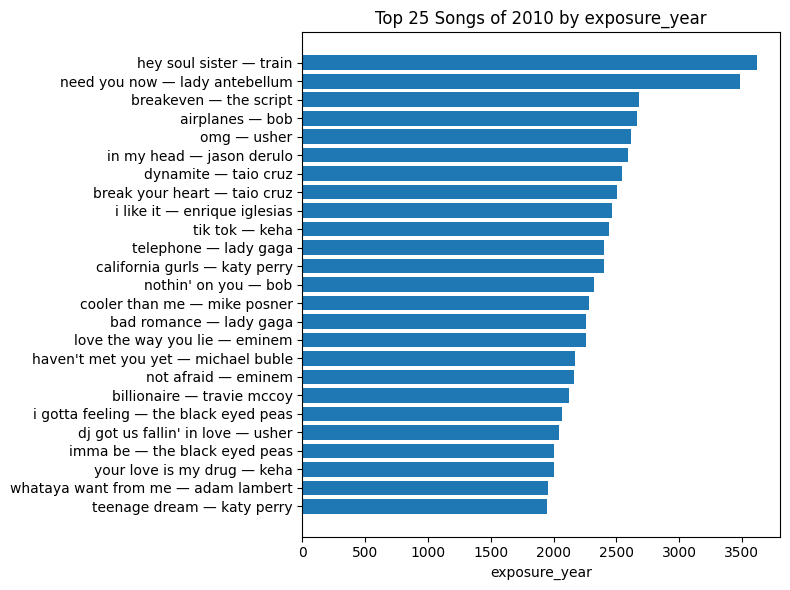

In [125]:
def top_songs_for_year(df, year, metric="exposure_year", n=10, ascending=False):
    if year not in df["year"].unique():
        raise ValueError(f"Year {year} not found in dataframe")

    # slice
    sub = df[df["year"] == year].copy()

    # sort
    sub = sub.sort_values(by=metric, ascending=ascending)

    # pick top n
    return sub[["year","song_base","artist_base",metric,"weeks_in_hot100_year","best_rank_year"]].head(n)

def plot_top_songs_year(df, year, metric="exposure_year", n=10, ascending=False):
    topn = top_songs_for_year(df, year, metric, n, ascending)
    plt.figure(figsize=(8,6))
    plt.barh(topn["song_base"] + " — " + topn["artist_base"], topn[metric])
    plt.title(f"Top {n} Songs of {year} by {metric}")
    plt.xlabel(metric)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_top_songs_year(billboard_yearly_df, 2010, metric="exposure_year", n=25, ascending=False)
# plot_top_songs_year(billboard_yearly_df, 2010, metric="avg_rank_year", n=25, ascending=True)

In [126]:
# export cleaned billboard dataset to parquet
billboard_weekly_df.to_parquet("dataset_cleaned/billboard_weekly.parquet", index=False)
billboard_yearly_df.to_parquet("dataset_cleaned/billboard_yearly.parquet", index=False)

### Load and clean the Spotify dataset

In [127]:
spotify_df = spotify_df[spotify_df["year"].between(2010, 2023, inclusive="both")].copy() 

spotify_df = spotify_df.drop_duplicates(subset=["year","track_id"]).reset_index(drop=True)

keep_cols = [
    "year","track_id","track_name","track_popularity","album",
    "artist_name","artist_genres",
    # could be useful for plots I guess??
    "danceability","energy","loudness","mode","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms",
    "time_signature","key"
]
spotify_df = spotify_df[ [c for c in keep_cols if c in spotify_df.columns] ].copy()


song_norm_out_sp = spotify_df["track_name"].apply(normalize_title)
spotify_df["song_base"]          = song_norm_out_sp.apply(lambda x: x[0])
spotify_df["contributors_title"] = song_norm_out_sp.apply(lambda x: x[1])
spotify_df["flag_versioned"]     = song_norm_out_sp.apply(lambda x: x[2])
spotify_df["removed_suffix"]     = song_norm_out_sp.apply(lambda x: x[3])

artist_norm_out_sp = spotify_df["artist_name"].apply(normalize_artist)
spotify_df["artist_base"] = artist_norm_out_sp.apply(lambda x: x[0])
spotify_df["artist_all"]  = artist_norm_out_sp.apply(lambda x: x[1])

spotify_df

,year,track_id,track_name,track_popularity,album,artist_name,artist_genres,danceability,energy,loudness,...,tempo,duration_ms,time_signature,key,song_base,contributors_title,flag_versioned,removed_suffix,artist_base,artist_all
0,2010,7BqBn9nzAq8spo5e7cZ0dJ,Just the Way You Are,85,Doo-Wops & Hooligans,Bruno Mars,"['dance pop', 'pop']",0.635,0.841,-5.379,...,109.021,220734,4,5,just the way you are,[],False,None,bruno mars,[bruno mars]
1,2010,15JINEqzVMv3SvJTAXAKED,Love The Way You Lie,85,Recovery,Eminem,"['detroit hip hop', 'hip hop', 'rap']",0.749,0.925,-5.034,...,86.989,263373,4,10,love the way you lie,[],False,None,eminem,[eminem]
2,2010,0SiywuOBRcynK0uKGWdCnn,Bad Romance,84,The Fame Monster (Deluxe Edition),Lady Gaga,"['art pop', 'dance pop', 'pop']",0.696,0.921,-3.755,...,119.001,294573,4,0,bad romance,[],False,None,lady gaga,[lady gaga]
3,2010,2GYHyAoLWpkxLVa4oYTVko,Alors on danse - Radio Edit,79,Cheese,Stromae,"['belgian pop', 'g-house']",0.791,0.590,-9.206,...,119.951,206067,4,1,alors on danse,[],True,- radio edit,stromae,[stromae]
4,2010,0HPD5WQqrq7wPWR7P7Dw1i,TiK ToK,85,Animal (Expanded Edition),Kesha,"['dance pop', 'pop']",0.755,0.837,-2.718,...,120.028,199693,4,2,tik tok,[],False,None,kesha,[kesha]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2023,0HD8mbiPjp3o94X3EaZp0o,exes,56,exes,Tate McRae,['pop'],0.838,0.569,-6.324,...,136.965,159400,4,5,exes,[],False,None,tate mcrae,[tate mcrae]
1396,2023,3XB5uhhlYSnkxpSihkNQwh,QLONA,79,MAÑANA SERÁ BONITO (BICHOTA SEASON),KAROL G,"['reggaeton', 'reggaeton colombiano', 'trap la...",0.842,0.756,-7.409,...,169.925,172798,4,7,qlona,[],False,None,karol g,[karol g]
1397,2023,4sx6NRwL6Ol3V6m9exwGlQ,LOVE AGAIN,69,LOVE AGAIN,The Kid LAROI,['australian hip hop'],0.662,0.398,-6.691,...,107.001,145850,4,11,love again,[],False,None,the kid laroi,[the kid laroi]
1398,2023,2Zo1PcszsT9WQ0ANntJbID,Feather,91,emails i cant send fwd:,Sabrina Carpenter,['pop'],0.787,0.686,-4.370,...,123.510,185553,4,6,feather,[],False,None,sabrina carpenter,[sabrina carpenter]


In [128]:
# save cleaned spotify dataset to parquet
spotify_df.to_parquet("dataset_cleaned/spotify.parquet", index=False)

### Merged Datasets

In [131]:
# JUPYTER CELL 7 — primary join
sp_ovl = spotify_df[spotify_df["year"].between(2010, 2021, inclusive="both")].copy()

join_cols = ["weeks_in_hot100_year","weeks_top10_year","weeks_at_1_year",
             "best_rank_year","avg_rank_year","exposure_year","first_seen_year","weeks_to_peak_year"]

join_df = sp_ovl.merge(
    billboard_yearly_df,
    on=["song_base","artist_base","year"],
    how="left",
    suffixes=("","_bb")
)

# mark which matched
join_df["matched_primary"] = join_df["best_rank_year"].notna()

# fallback: explode artist_all and try again for only the unmatched rows
unmatched = join_df[~join_df["matched_primary"]].copy()
if not unmatched.empty:
    exp = unmatched.explode("artist_all")
    j_fb = exp.merge(
        billboard_yearly_df.rename(columns={"artist_base":"artist_all"}),  # align col name
        on=["song_base","artist_all","year"],
        how="left",
        suffixes=("","_bb")
    )
    j_fb = j_fb.sort_values(["year","track_id"]).copy()
    take_cols = join_cols + ["artist_all"]  # keep which artist matched
    agg_first = {c: "first" for c in take_cols}
    j_fb_reduced = j_fb.groupby(["year","track_id"], as_index=False).agg(agg_first)

    for c in join_cols:
        join_df.loc[~join_df["matched_primary"], c] = j_fb_reduced.set_index(["year","track_id"]).loc[
            join_df.loc[~join_df["matched_primary"], ["year","track_id"]].set_index(["year","track_id"]).index,
            c
        ].values

    join_df.loc[~join_df["matched_primary"], "fallback_artist_matched"] = j_fb_reduced.set_index(["year","track_id"]).loc[
        join_df.loc[~join_df["matched_primary"], ["year","track_id"]].set_index(["year","track_id"]).index,
        "artist_all"
    ].values

join_df["on_billboard_year"] = join_df["best_rank_year"].notna()

# coverage metrics = percentage of Spotify songs that were on Billboard per year
coverage = join_df.groupby("year")["on_billboard_year"].mean().rename("coverage_rate").reset_index()
coverage["coverage_rate"] = (coverage["coverage_rate"]*100).round(1)
coverage


,year,coverage_rate
0,2010,65.0
1,2011,71.0
2,2012,68.0
3,2013,72.0
4,2014,64.0
5,2015,64.0
6,2016,70.0
7,2017,77.0
8,2018,57.0
9,2019,63.0
